# TSNE Analysis

In [1]:
from ensemble_analysis import EnsembleAnalysis

In [2]:
ens_codes = [
    "PED00423e001",
    "PED00424e001",
]
data_dir = 'C:/Users/nikol/Documents/test_dir'
featurization = "phi_psi"
reduce_dim_method = "tsne"
perplexityVals = range(500,1001,500)


In [3]:
analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_ped()

File already exists. Skipping download.
File already exists. Skipping extracting.
File already exists. Skipping download.
File already exists. Skipping extracting.


In [4]:
analysis.generate_trajectories()

Trajectory already exists. Loading trajectory.
Trajectory already exists. Loading trajectory.


In [5]:
analysis.perform_feature_extraction(featurization=featurization)

Performing feature extraction for PED ID: PED00423, ensemble ID: e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for PED ID: PED00424, ensemble ID: e001.
Transformed ensemble shape: (1000, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 'LYS52-PHI', 'SER53-PHI', 'PHE54-PHI', 'LYS55-PHI', 'ASN56-PHI', 'ALA57-PHI', 'PRO58-PHI', 'LEU59-PHI', 'LEU60-PHI', 'AL

In [6]:
rg = analysis.rg_calculator()
len(rg)

2000

In [7]:
analysis.fit_dimensionality_reduction(method=reduce_dim_method, perplexityVals = perplexityVals, metric='euclidean')

tsne is running...
Dimensionality reduction for perplexity 500 already performed. Skipping.
Dimensionality reduction for perplexity 1000 already performed. Skipping.
tsne is done! All files saved in C:/Users/nikol/Documents/test_dir\dim_reduction


In [8]:
analysis.cluster(range_n_clusters=range(2,10,1))

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446

## Test Entire Pipeline

In [1]:
from ensemble_analysis import EnsembleAnalysis

ens_codes = [
    "PED00423e001",
    "PED00424e001",
]
data_dir = 'C:/Users/nikol/Documents/test_dir'

featurization_params = {'featurization': 'phi_psi'}
reduce_dim_params = {'method': 'tsne', 'perplexityVals': range(500,1001,500), 'metric' : 'euclidean'}
clustering_params = {'range_n_clusters':range(2,10,1)}

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.execute_pipeline(featurization_params, reduce_dim_params, clustering_params)

Download complete. Saved to: C:/Users/nikol/Documents/test_dir\PED00423e001.tar.gz
Downloaded file PED00423e001.tar.gz from PED.
Extracted file PED00423e001.pdb.
Download complete. Saved to: C:/Users/nikol/Documents/test_dir\PED00424e001.tar.gz
Downloaded file PED00424e001.tar.gz from PED.
Extracted file PED00424e001.pdb.
Generating trajectory from PED00423e001.pdb.
Saving trajectory.
Generating trajectory from PED00424e001.pdb.
Saving trajectory.
Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


tsne file for the perplexity value of 500 is saved in C:/Users/nikol/Documents/test_dir\dim_reduction 
tsne file for the perplexity value of 1000 is saved in C:/Users/nikol/Documents/test_dir\dim_reduction 
tsne is done! All files saved in C:/Users/nikol/Documents/test_dir\dim_reduction


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

[500.0, 2.0]
[   1    2   12 ... 1996 1997 1999] 0
[   0    3    4    5    6    7    8    9   10   11   13   16   17   18
   19   20   21   22   23   24   26   27   30   33   34   36   37   40
   41   42   43   44   45   47   48   49   50   51   53   56   57   59
   60   61   62   64   65   68   69   70   71   72   73   74   75   77
   78   80   81   83   84   85   86   87   89   90   91   93   94   95
   97   98   99  102  103  105  106  107  108  109  110  112  113  114
  115  116  117  118  119  120  121  122  123  124  125  126  128  130
  132  135  136  137  139  140  141  142  144  145  146  148  149  151
  152  153  155  156  157  158  159  160  161  165  167  168  169  170
  171  172  173  174  175  177  178  179  180  181  183  186  187  188
  189  190  192  193  194  195  196  197  199  200  201  202  203  204
  206  207  208  209  210  211  213  214  216  217  220  221  222  223
  224  225  226  227  229  230  231  232  233  234  235  236  237  240
  241  242  244  245  247 

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


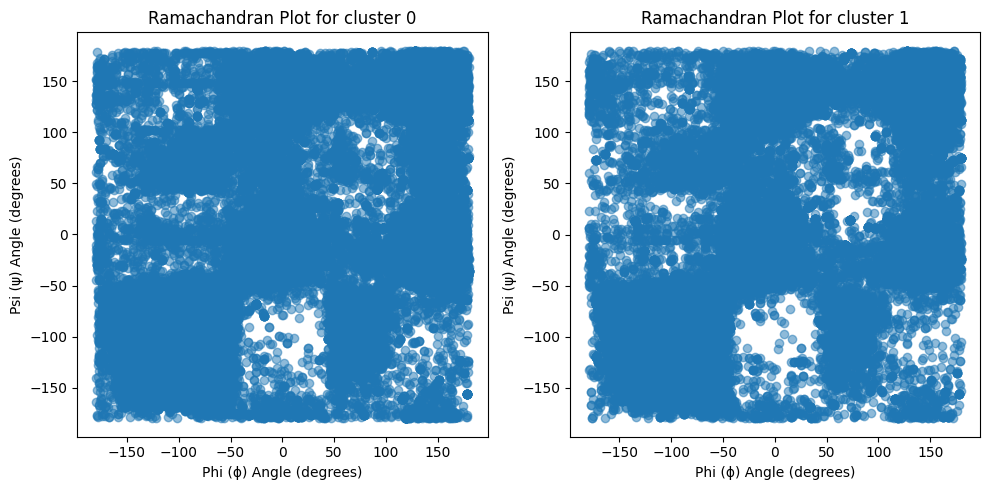

In [2]:
analysis.tsne_ramachandran_plot()

[500.0, 2.0]
[   1    2   12 ... 1996 1997 1999]
[   0    3    4    5    6    7    8    9   10   11   13   16   17   18
   19   20   21   22   23   24   26   27   30   33   34   36   37   40
   41   42   43   44   45   47   48   49   50   51   53   56   57   59
   60   61   62   64   65   68   69   70   71   72   73   74   75   77
   78   80   81   83   84   85   86   87   89   90   91   93   94   95
   97   98   99  102  103  105  106  107  108  109  110  112  113  114
  115  116  117  118  119  120  121  122  123  124  125  126  128  130
  132  135  136  137  139  140  141  142  144  145  146  148  149  151
  152  153  155  156  157  158  159  160  161  165  167  168  169  170
  171  172  173  174  175  177  178  179  180  181  183  186  187  188
  189  190  192  193  194  195  196  197  199  200  201  202  203  204
  206  207  208  209  210  211  213  214  216  217  220  221  222  223
  224  225  226  227  229  230  231  232  233  234  235  236  237  240
  241  242  244  245  247  2

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


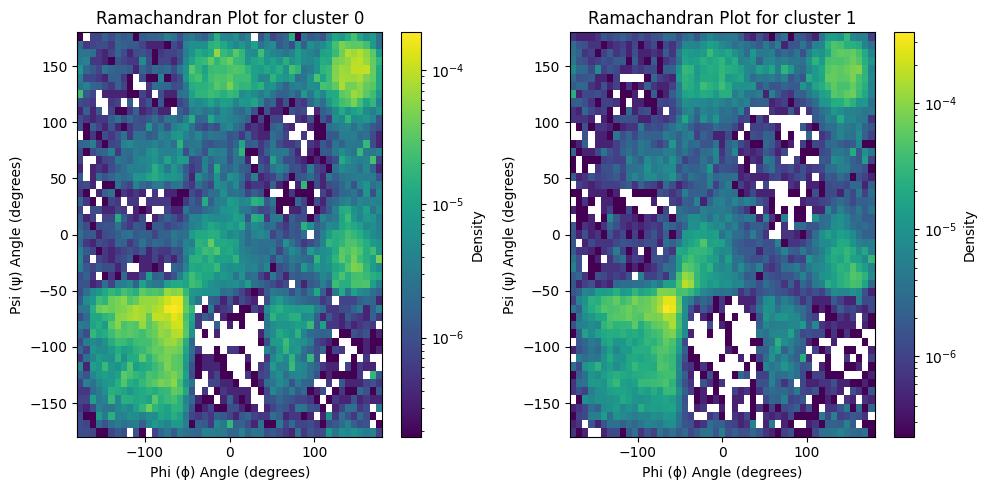

In [3]:
analysis.tsne_ramachandran_plot_density()

500.0 2.0


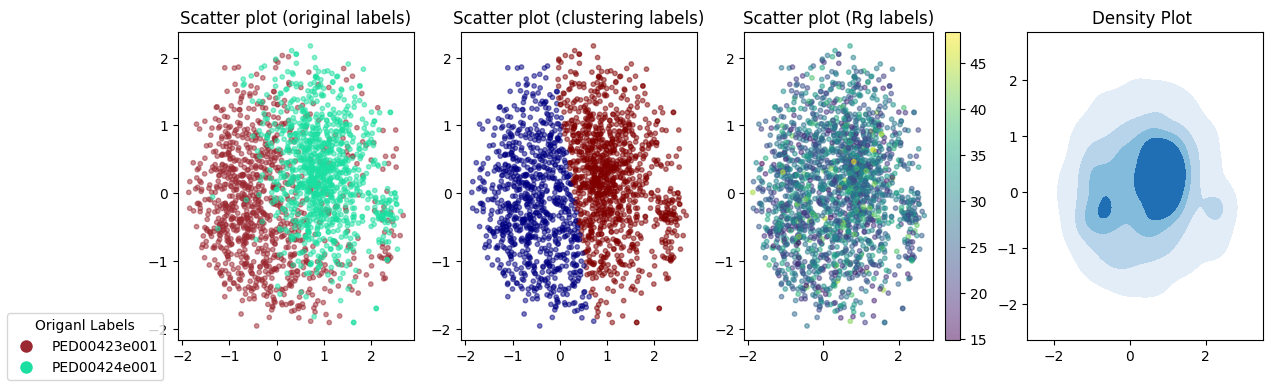

In [4]:
analysis.tsne_scatter_plot()

In [5]:
analysis.tsne_scatter_plot_2()

500.0 2.0
